In [1]:
# Modules
import os

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Use numpy to convert to arrays
import numpy as np

from scipy.stats import sem

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the model we are using
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [2]:
# Load the "US_emissions_by_gas_1990-2017_data.xlsx" Dataset

US_gas_data = pd.read_excel("data/US_emissions_by_gas_1990_2017_data.xlsx")
US_gas_data.head()

,Year,Carbon_dioxide,Methane,Nitrous_oxide,Fluorinated_gases,Total
0,1990,5121.179440,779.845550,370.307694,99.667859,6371.000543
1,1991,5071.563914,784.384856,368.961757,90.704668,6315.615194
2,1992,5174.670601,783.176602,371.786442,95.300712,6424.934357
3,1993,5281.386608,770.308404,385.347234,95.027350,6532.069596
4,1994,5375.033803,775.160651,376.511527,98.129806,6624.835787


In [80]:
X = US_gas_data['Year']
Y = np.vstack([US_gas_data['Carbon_dioxide'], US_gas_data['Methane'], US_gas_data['Nitrous_oxide'], US_gas_data['Fluorinated_gases']])

<function matplotlib.pyplot.show(*args, **kw)>

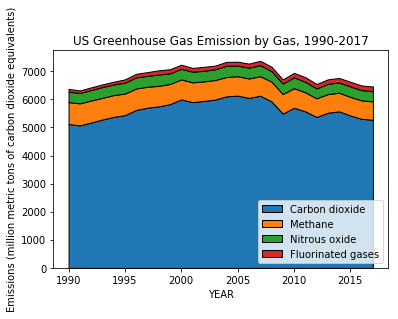

In [81]:
labels = ['Carbon dioxide', 'Methane', 'Nitrous oxide', 'Fluorinated gases']
plt.stackplot(X, Y, labels=labels, edgecolor='black')
plt.legend(loc=4)

plt.xlabel('YEAR')
plt.ylabel('Emissions (million metric tons of carbon dioxide equivalents)')
plt.title('US Greenhouse Gas Emission by Gas, 1990-2017')

plt.show

CARBON DIOXIDE LINEAR REGRESSION

In [3]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values so we use reshape to create this

X = US_gas_data.Year.values.reshape(-1, 1)
y = US_gas_data.Carbon_dioxide.values.reshape(-1, 1)

print("Carbon dioxide: ", X.shape, y.shape)

Carbon dioxide:  (28, 1) (28, 1)


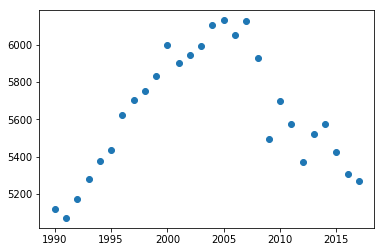

In [4]:
# Plot the data

plt.scatter(X, y)

In [5]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [6]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[6.30583463]]
y-axis intercept:  [-6998.96790078]


In [8]:
# Note: we have to transform our min and max values in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1990]]
Max X Value: [[2017]]


In [9]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

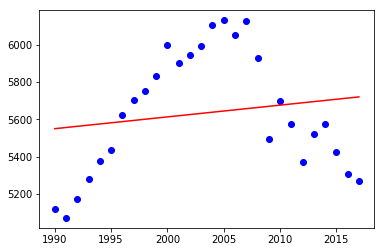

In [10]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [11]:
## Quantifying Carbon dioxide Linear Regression
# Create a linear model
model_CO2 = LinearRegression()

# Fit (Train) our model to the data
model_CO2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# Use our model to predict a value
predicted = model_CO2.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 99958.72323071003
R-squared (R2 ): 0.025299739699070622


In [14]:
# Overall Score for the Carbon dioxide model
model_CO2.score(X, y)

0.025299739699070622

In [15]:
## Validation: Testing and Training Carbon dioxide Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
model_CO2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
model_CO2.score(X_test, y_test)

0.0017183747430329353

In [19]:
###########################

METHANE LINEAR REGRESSION

In [20]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values so we use reshape to create this

X = US_gas_data.Year.values.reshape(-1, 1)
y = US_gas_data.Methane.values.reshape(-1, 1)

print("Methane: ", X.shape, y.shape)

Methane:  (28, 1) (28, 1)


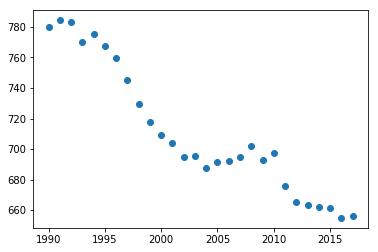

In [21]:
# Plot the data

plt.scatter(X, y)

In [22]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [23]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-4.95867356]]
y-axis intercept:  [10645.8614195]


In [25]:
# Note: we have to transform our min and max values in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1990]]
Max X Value: [[2017]]


In [26]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

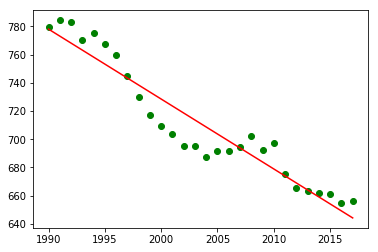

In [27]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='green')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [28]:
## Quantifying Methane Linear Regression
# Create a linear model
model_methane = LinearRegression()

# Fit (Train) our model to the data
model_methane.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
# Use our model to predict a value
predicted = model_methane.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 161.0877876903143
R-squared (R2 ): 0.9087571382419627


In [30]:
# Overall Score for the Methane model
model_methane.score(X, y)

0.9087571382419628

In [31]:
## Validation: Testing and Training Methane Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
model_methane.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
model_methane.score(X_test, y_test)

0.8709636966461273

In [34]:
###########################

NITROUS OXIDE LINEAR REGRESSION

In [35]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values so we use reshape to create this

X = US_gas_data.Year.values.reshape(-1, 1)
y = US_gas_data.Nitrous_oxide.values.reshape(-1, 1)

print("Nitrous oxide: ", X.shape, y.shape)

Nitrous oxide:  (28, 1) (28, 1)


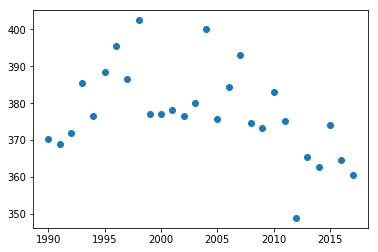

In [36]:
# Plot the data

plt.scatter(X, y)

In [37]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [38]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.607634]]
y-axis intercept:  [1594.89215211]


In [40]:
# Note: we have to transform our min and max values in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1990]]
Max X Value: [[2017]]


In [41]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

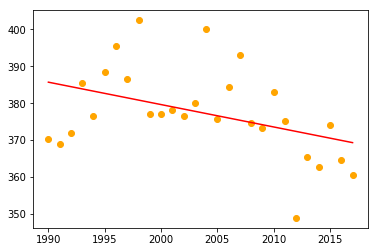

In [42]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='orange')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [43]:
## Quantifying Nitrous oxide Linear Regression
# Create a linear model
model_NO = LinearRegression()

# Fit (Train) our model to the data
model_NO.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
# Use our model to predict a value
predicted = model_NO.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 115.46549110801367
R-squared (R2 ): 0.17262866507671493


In [45]:
# Overall Score for the Nitrous oxide model
model_NO.score(X, y)

0.17262866507671493

In [46]:
## Validation: Testing and Training Nitrous oxide Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
model_NO.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
model_NO.score(X_test, y_test)

-0.42520311750892903

In [49]:
###########################

FLUORINATED GASES LINEAR REGRESSION

In [50]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values so we use reshape to create this

X = US_gas_data.Year.values.reshape(-1, 1)
y = US_gas_data.Fluorinated_gases.values.reshape(-1, 1)

print("Fluorinated gases: ", X.shape, y.shape)

Fluorinated gases:  (28, 1) (28, 1)


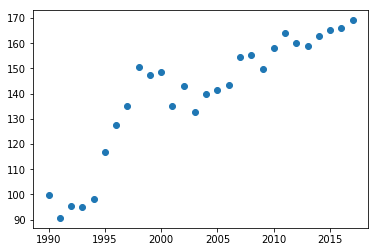

In [51]:
# Plot the data

plt.scatter(X, y)

In [52]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [53]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[2.65191317]]
y-axis intercept:  [-5173.65336193]


In [55]:
# Note: we have to transform our min and max values in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1990]]
Max X Value: [[2017]]


In [56]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

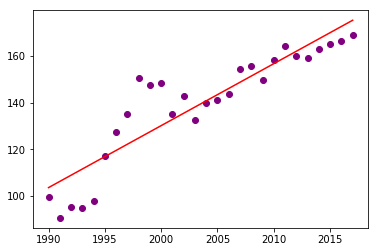

In [57]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='purple')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [58]:
## Quantifying Fluorinated Gases Linear Regression
# Create a linear model
model_fluorinated = LinearRegression()

# Fit (Train) our model to the data
model_fluorinated.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
# Use our model to predict a value
predicted = model_fluorinated.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 105.0927670141875
R-squared (R2 ): 0.813656304123276


In [60]:
# Overall Score for the Fluorinated Gases model
model_fluorinated.score(X, y)

0.813656304123276

In [61]:
## Validation: Testing and Training Fluorinated Gases Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [62]:
model_fluorinated.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
model_fluorinated.score(X_test, y_test)

0.4586515858418923

In [64]:
###########################

TOTAL LINEAR REGRESSION

In [65]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values so we use reshape to create this

X = US_gas_data.Year.values.reshape(-1, 1)
y = US_gas_data.Total.values.reshape(-1, 1)

print("Total: ", X.shape, y.shape)

Total:  (28, 1) (28, 1)


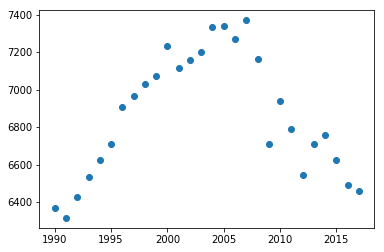

In [66]:
# Plot the data

plt.scatter(X, y)

In [67]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [68]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[3.39144024]]
y-axis intercept:  [68.1323089]


In [70]:
# Note: we have to transform our min and max values in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1990]]
Max X Value: [[2017]]


In [71]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

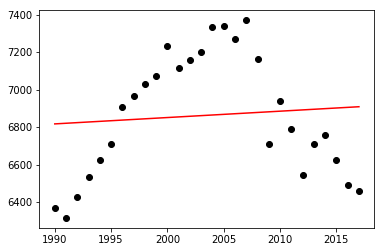

In [72]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='black')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [73]:
## Quantifying Total Linear Regression
# Create a linear model
model_total = LinearRegression()

# Fit (Train) our model to the data
model_total.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
# Use our model to predict a value
predicted = model_total.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 102703.61131911761
R-squared (R2 ): 0.007254393547205695


In [75]:
# Overall Score for the Total model
model_total.score(X, y)

0.007254393547205695

In [76]:
## Validation: Testing and Training Total Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [77]:
model_total.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
model_total.score(X_test, y_test)

-0.035147096383477905